## Introduction
As a marketing assistant, I receive an application for our school from education agencies.
We need to share the student information with the admissions team, but the Google Sheets we used before had some flaws such as the homestay period cannot be changed in days, and it does not include the additional homestay fee during the summer.

I added or changed formulas based on team requests.

[Google Sheets](https://docs.google.com/spreadsheets/d/e/2PACX-1vQlqgFIi9IlWOD6zgPryWTh7B_b5t9bOwNDgf4GvCaEOuNN58HQaArRsycTBIxWGA/pubhtml)
(Data is masked to protect sensitive data)



## Formulas

### 1. INDEX and MATCH functions

The data entry process is the following:
1. Add student information to the Registration sheet
2. Input the student's full name into C10 in the Enrollment Form sheet
3. Input the student's ID into C11 in the Enrollment Form sheet (if applicable)
4. Information on the Registration sheet appears on the Enrollment Form sheet

Example:<br>
=IFERROR(<br>
INDEX(Registrations!\\$H:\\$H,<br>
MATCH(\\$C\\$8&\\$C\\$9,Registration!\\$K:\\$K&Registration!\\$J:\\$J,0),<br>
0),<br>
"")<br>

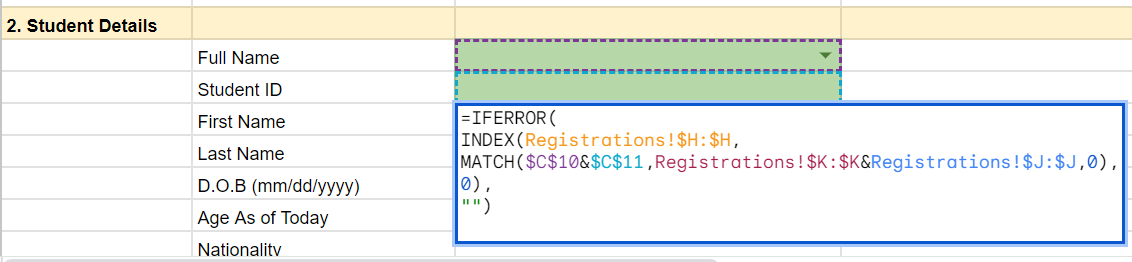


### 2. TRANSPOSE function

Show the correct programs in column S in the Registration sheet based on column F in the Registration sheet

Create a list of programs in the Dropdown sheet

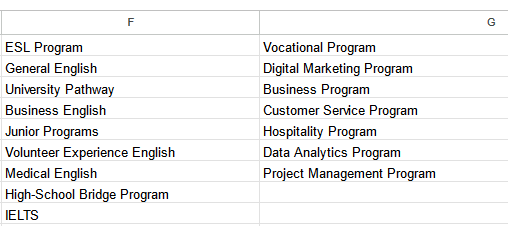

Create the Program sheet to show options

Example:<br>
=IFNA(<br>
TRANSPOSE(INDEX(Dropdown!\\$F\\$2:\\$G\\$30,,<br>
MATCH(Registration!F2,Dropdown!\\$C\\$2:\\$C\\$10,0))),<br>
"")<br>

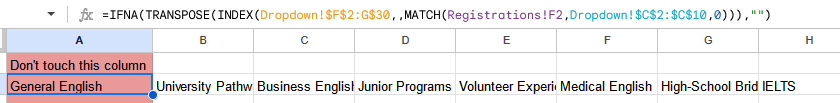

Add a data validation rule

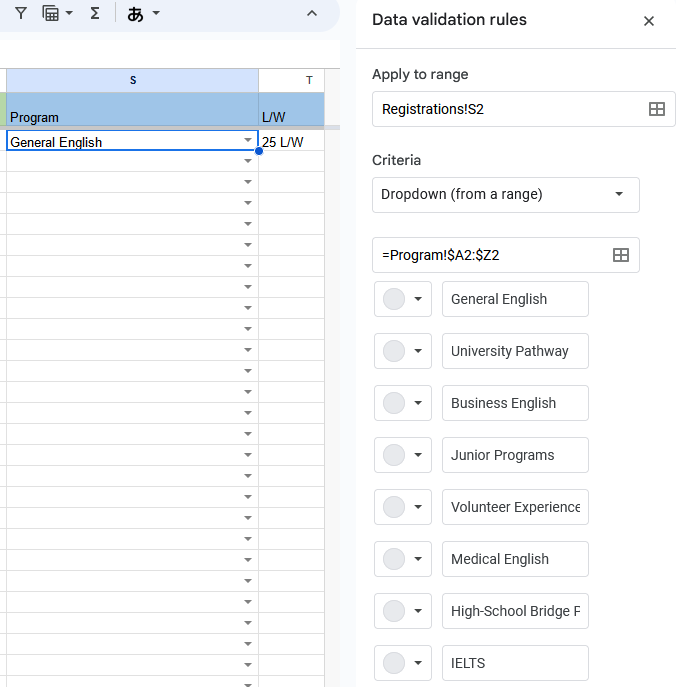

### 3. Conditional format rules

Change the color of a cell if the start/end date is a holiday

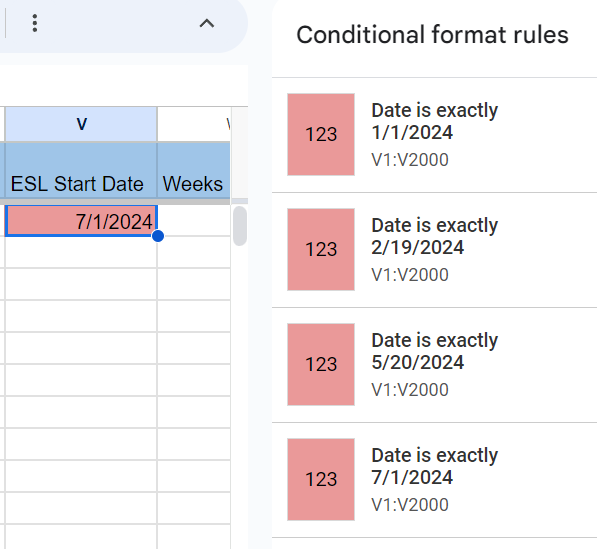

### 4. IF function

If the start date is Tuesday because of a holiday, use a different formula to keep the end date Friday

Example:<br>
=IF(<br>
OR(<br>
TEXT(U2,"ddd")="Tue",<br>
TEXT(V2,"ddd")="Tue"),<br>
V2+W2\*7-4,<br>
V2+W2\*7-3)<br>

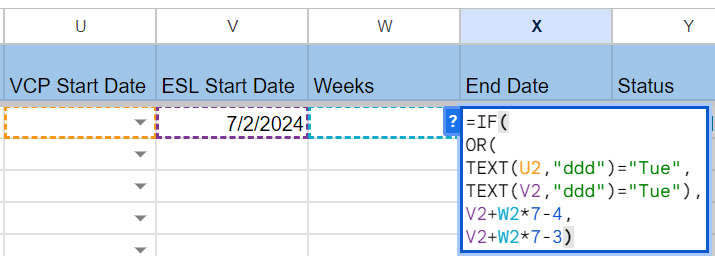

### 5. IFS function

Apply a different material fee depending on the program

Example:<br>
=IFS(<br>
OR(S2="Junior Programs",S2="High-School Bridge Program"),<br>
W2\*50+150,<br>
F2="ESL",<br>
W2\*20,<br>
F2="VET",<br>
250,<br>
TRUE,<br>
"")<br>

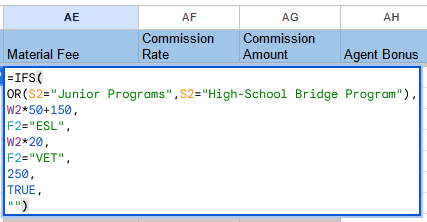

### 6. TEXTJOIN function

Combine the text from the two cells in the Registration sheet into a single string in the Enrollment Form sheet

Example:<br>
=IFERROR(<br>
TEXTJOIN(" ",TRUE,<br>
INDEX(Registration!\\$AI:\\$AI,<br>
MATCH(\\$C\\$8&\\$C\\$9,Registration!\\$K:\\$K&Registration!\\$J:\\$J,0),<br>
0):<br>
INDEX(Registration!\\$AJ:\\$AJ,<br>
MATCH(\\$C\\$8&\\$C\\$9,Registration!\\$K:\\$K&Registration!\\$J:\\$J,0),<br>
0)),<br>
"")<br>

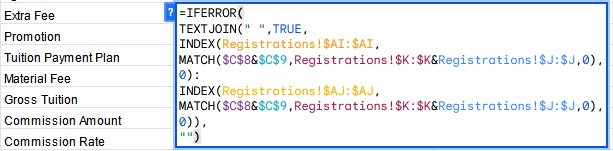

### 7. MOD function

Calculate the additional homestay fee from June 1 to August 31, 2024

If the homestay period is X weeks + 0, 1, 2 or 3 days, the additional fee is X \* 50 dollars<br>
If the homestay period is X weeks + 4, 5 or 6 days, the additional fee is (X+1) \* 50 dollars<br>

Example:<br>
=IFS(<br>
AZ2="N/A",<br>
0,<br>
AZ2="N/A",<br>
0,<br>
MOD((BA2-AZ2),7)<=3,<br>
ROUNDDOWN((BA2-AZ2)/7,0)\*50,<br>
MOD((BA2-AZ2),7)>=4,<br>
ROUNDUP((BA2-AZ2)/7,0)\*50<br>
)<br>

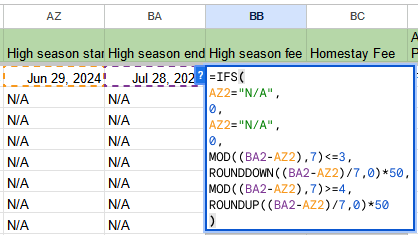